In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


pd.set_option('display.max_columns',200)

In [2]:
data = pd.read_csv('datasets/deepseek_vs_chatgpt.csv')

In [3]:
data.head()

,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,User_ID,Query_Type,Input_Text,Input_Text_Length,Response_Tokens,Topic_Category,User_Rating,User_Experience_Score,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
0,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,c878a177-2da9-4224-8cf8-1d56a1c6a755,General,Draft a professional email about personal finance,7,280,Professional Writing,4,1.28,40,Mobile,es,0.7842,3.30,Standard,0,6,2,Antarctica (the territory South of 60 deg S)
1,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,7096d0f1-d0dc-4333-a5d0-de9dfd1b99fa,General,Write a blog post about personal finance,7,80,Content Creation,4,1.28,24,Laptop/Desktop,zh,0.8194,3.28,Standard,1,2,2,Ukraine
2,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,e690c254-582f-49c1-89c3-0b4dd8ee59be,General,What are the best practices for AI ethics?,8,131,Best Practices,3,0.88,34,Mobile,en,0.8090,3.07,Standard,0,2,0,Grenada
3,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,0b6a010d-9d03-44c4-bf7f-7f8d2cc461e2,General,Write a blog post about climate change,7,426,Content Creation,5,1.68,18,Mobile,fr,0.8233,3.06,Standard,0,9,0,Guyana
4,2024-05-16,5,Thursday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,ffa90616-1fa9-48ff-842d-e84e193c64f4,Technical,Debug this error in REST APIs:,6,215,Debugging,5,2.04,10,Mobile,de,0.9366,1.48,Fast,0,9,3,India


In [4]:
data.shape

(10000, 28)

In [5]:
data.dtypes

Date                              object
Month_Num                          int64
Weekday                           object
AI_Platform                       object
AI_Model_Version                  object
Active_Users                       int64
New_Users                          int64
Churned_Users                      int64
Daily_Churn_Rate                 float64
Retention_Rate                   float64
User_ID                           object
Query_Type                        object
Input_Text                        object
Input_Text_Length                  int64
Response_Tokens                    int64
Topic_Category                    object
User_Rating                        int64
User_Experience_Score            float64
Session_Duration_sec               int64
Device_Type                       object
Language                          object
Response_Accuracy                float64
Response_Speed_sec               float64
Response_Time_Category            object
Correction_Neede

In [6]:
data.columns

Index(['Date', 'Month_Num', 'Weekday', 'AI_Platform', 'AI_Model_Version',
       'Active_Users', 'New_Users', 'Churned_Users', 'Daily_Churn_Rate',
       'Retention_Rate', 'User_ID', 'Query_Type', 'Input_Text',
       'Input_Text_Length', 'Response_Tokens', 'Topic_Category', 'User_Rating',
       'User_Experience_Score', 'Session_Duration_sec', 'Device_Type',
       'Language', 'Response_Accuracy', 'Response_Speed_sec',
       'Response_Time_Category', 'Correction_Needed', 'User_Return_Frequency',
       'Customer_Support_Interactions', 'Region'],
      dtype='object')

In [7]:
data.isnull().sum()

Date                               0
Month_Num                          0
Weekday                            0
AI_Platform                        0
AI_Model_Version                   0
Active_Users                       0
New_Users                          0
Churned_Users                      0
Daily_Churn_Rate                   0
Retention_Rate                     0
User_ID                            0
Query_Type                         0
Input_Text                         0
Input_Text_Length                  0
Response_Tokens                    0
Topic_Category                     0
User_Rating                        0
User_Experience_Score              0
Session_Duration_sec               0
Device_Type                        0
Language                           0
Response_Accuracy                379
Response_Speed_sec                 0
Response_Time_Category             0
Correction_Needed                  0
User_Return_Frequency              0
Customer_Support_Interactions      0
R

In [8]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [9]:
data.isnull().sum()

Date                             0
Month_Num                        0
Weekday                          0
AI_Platform                      0
AI_Model_Version                 0
Active_Users                     0
New_Users                        0
Churned_Users                    0
Daily_Churn_Rate                 0
Retention_Rate                   0
User_ID                          0
Query_Type                       0
Input_Text                       0
Input_Text_Length                0
Response_Tokens                  0
Topic_Category                   0
User_Rating                      0
User_Experience_Score            0
Session_Duration_sec             0
Device_Type                      0
Language                         0
Response_Accuracy                0
Response_Speed_sec               0
Response_Time_Category           0
Correction_Needed                0
User_Return_Frequency            0
Customer_Support_Interactions    0
Region                           0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Date                             datetime64[ns]
Month_Num                                 int64
Weekday                                  object
AI_Platform                              object
AI_Model_Version                         object
Active_Users                              int64
New_Users                                 int64
Churned_Users                             int64
Daily_Churn_Rate                        float64
Retention_Rate                          float64
User_ID                                  object
Query_Type                               object
Input_Text                               object
Input_Text_Length                         int64
Response_Tokens                           int64
Topic_Category                           object
User_Rating                               int64
User_Experience_Score                   float64
Session_Duration_sec                      int64
Device_Type                              object
Language                                

In [13]:
data.columns

Index(['Date', 'Month_Num', 'Weekday', 'AI_Platform', 'AI_Model_Version',
       'Active_Users', 'New_Users', 'Churned_Users', 'Daily_Churn_Rate',
       'Retention_Rate', 'User_ID', 'Query_Type', 'Input_Text',
       'Input_Text_Length', 'Response_Tokens', 'Topic_Category', 'User_Rating',
       'User_Experience_Score', 'Session_Duration_sec', 'Device_Type',
       'Language', 'Response_Accuracy', 'Response_Speed_sec',
       'Response_Time_Category', 'Correction_Needed', 'User_Return_Frequency',
       'Customer_Support_Interactions', 'Region'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           10000 non-null  datetime64[ns]
 1   Month_Num                      10000 non-null  int64         
 2   Weekday                        10000 non-null  object        
 3   AI_Platform                    10000 non-null  object        
 4   AI_Model_Version               10000 non-null  object        
 5   Active_Users                   10000 non-null  int64         
 6   New_Users                      10000 non-null  int64         
 7   Churned_Users                  10000 non-null  int64         
 8   Daily_Churn_Rate               10000 non-null  float64       
 9   Retention_Rate                 10000 non-null  float64       
 10  User_ID                        10000 non-null  object        
 11  Query_Type      

In [15]:
# 4. Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date                             0
Month_Num                        0
Weekday                          0
AI_Platform                      0
AI_Model_Version                 0
Active_Users                     0
New_Users                        0
Churned_Users                    0
Daily_Churn_Rate                 0
Retention_Rate                   0
User_ID                          0
Query_Type                       0
Input_Text                       0
Input_Text_Length                0
Response_Tokens                  0
Topic_Category                   0
User_Rating                      0
User_Experience_Score            0
Session_Duration_sec             0
Device_Type                      0
Language                         0
Response_Accuracy                0
Response_Speed_sec               0
Response_Time_Category           0
Correction_Needed                0
User_Return_Frequency            0
Customer_Support_Interactions    0
Region                           0
dty

In [16]:
# Statistical summary
print("\nStatistical Summary:")
data.describe(include='all')


Statistical Summary:


,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,User_ID,Query_Type,Input_Text,Input_Text_Length,Response_Tokens,Topic_Category,User_Rating,User_Experience_Score,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
count,10000,10000.000000,10000,10000,10000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,7,2,2,NaN,NaN,NaN,NaN,NaN,6270,2,24,NaN,NaN,8,NaN,NaN,NaN,4,5,NaN,NaN,3,NaN,NaN,NaN,243
top,NaN,NaN,Friday,ChatGPT,GPT-4-turbo,NaN,NaN,NaN,NaN,NaN,d76431c6-e76e-4624-ba3c-370baf7a17df,General,Write a blog post about personal finance,NaN,NaN,Professional Writing,NaN,NaN,NaN,Mobile,de,NaN,NaN,Fast,NaN,NaN,NaN,Korea
freq,NaN,NaN,1677,5076,5076,NaN,NaN,NaN,NaN,NaN,7,6322,447,NaN,NaN,1301,NaN,NaN,NaN,5034,2057,NaN,NaN,4883,NaN,NaN,NaN,95
mean,2024-04-24 18:38:09.600000,7.128900,NaN,NaN,NaN,1.196255e+06,100508.750000,35395.150000,0.035228,9.500000e-01,NaN,NaN,NaN,6.260700,274.765100,NaN,4.394700,1.626706,28.533700,NaN,NaN,0.850738,2.356651,NaN,0.144600,5.530600,1.476800,NaN
min,2023-07-01 00:00:00,1.000000,NaN,NaN,NaN,2.000000e+05,12500.000000,4000.000000,0.020000,9.500000e-01,NaN,NaN,NaN,4.000000,50.000000,NaN,3.000000,0.480000,5.000000,NaN,NaN,0.654200,0.330000,NaN,0.000000,1.000000,0.000000,NaN
25%,2023-12-06 00:00:00,4.000000,NaN,NaN,NaN,6.500000e+05,35000.000000,25000.000000,0.020000,9.500000e-01,NaN,NaN,NaN,6.000000,162.000000,NaN,4.000000,1.230000,17.000000,NaN,NaN,0.805575,1.250000,NaN,0.000000,3.000000,0.000000,NaN
50%,2024-05-02 12:00:00,8.000000,NaN,NaN,NaN,9.500000e+05,52500.000000,35000.000000,0.050000,9.500000e-01,NaN,NaN,NaN,7.000000,276.000000,NaN,5.000000,1.710000,27.000000,NaN,NaN,0.862200,2.070000,NaN,0.000000,6.000000,1.000000,NaN
75%,2024-09-07 00:00:00,10.000000,NaN,NaN,NaN,1.700000e+06,170000.000000,49000.000000,0.050000,9.500000e-01,NaN,NaN,NaN,7.000000,386.250000,NaN,5.000000,2.070000,38.000000,NaN,NaN,0.903300,3.450000,NaN,0.000000,8.000000,2.000000,NaN
max,2025-02-01 00:00:00,12.000000,NaN,NaN,NaN,3.050000e+06,305000.000000,61000.000000,0.050000,9.500000e-01,NaN,NaN,NaN,8.000000,500.000000,NaN,5.000000,2.280000,60.000000,NaN,NaN,0.997200,5.190000,NaN,1.000000,10.000000,3.000000,NaN


In [17]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:\n")
print(data.select_dtypes(include='object').nunique())


Unique Values in Categorical Columns:

Weekday                      7
AI_Platform                  2
AI_Model_Version             2
User_ID                   6270
Query_Type                   2
Input_Text                  24
Topic_Category               8
Device_Type                  4
Language                     5
Response_Time_Category       3
Region                     243
dtype: int64


In [18]:
# Confirm missing values are handled
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
Date                             0
Month_Num                        0
Weekday                          0
AI_Platform                      0
AI_Model_Version                 0
Active_Users                     0
New_Users                        0
Churned_Users                    0
Daily_Churn_Rate                 0
Retention_Rate                   0
User_ID                          0
Query_Type                       0
Input_Text                       0
Input_Text_Length                0
Response_Tokens                  0
Topic_Category                   0
User_Rating                      0
User_Experience_Score            0
Session_Duration_sec             0
Device_Type                      0
Language                         0
Response_Accuracy                0
Response_Speed_sec               0
Response_Time_Category           0
Correction_Needed                0
User_Return_Frequency            0
Customer_Support_Interactions    0
Region                 

In [19]:
# 6. Data Visualization

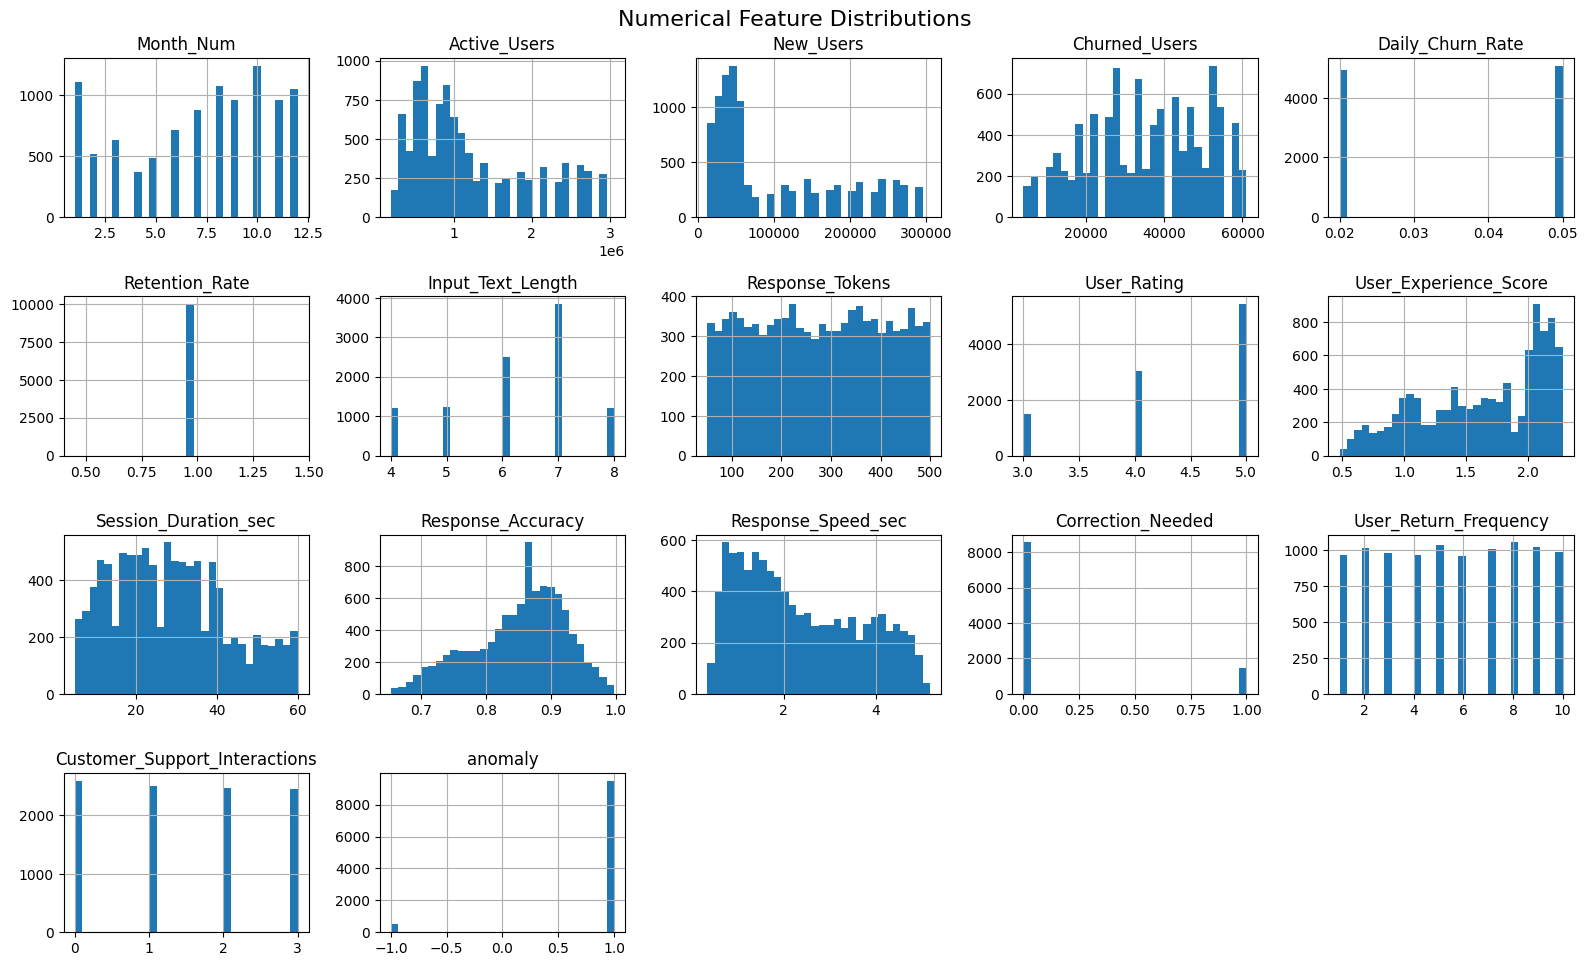

In [72]:
# Distribution of Numerical Features
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols].hist(figsize=(16, 12), bins=30, layout=(5, 5))
plt.suptitle('Numerical Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
data.columns

Index(['Date', 'Month_Num', 'Weekday', 'AI_Platform', 'AI_Model_Version',
       'Active_Users', 'New_Users', 'Churned_Users', 'Daily_Churn_Rate',
       'Retention_Rate', 'User_ID', 'Query_Type', 'Input_Text',
       'Input_Text_Length', 'Response_Tokens', 'Topic_Category', 'User_Rating',
       'User_Experience_Score', 'Session_Duration_sec', 'Device_Type',
       'Language', 'Response_Accuracy', 'Response_Speed_sec',
       'Response_Time_Category', 'Correction_Needed', 'User_Return_Frequency',
       'Customer_Support_Interactions', 'Region'],
      dtype='object')

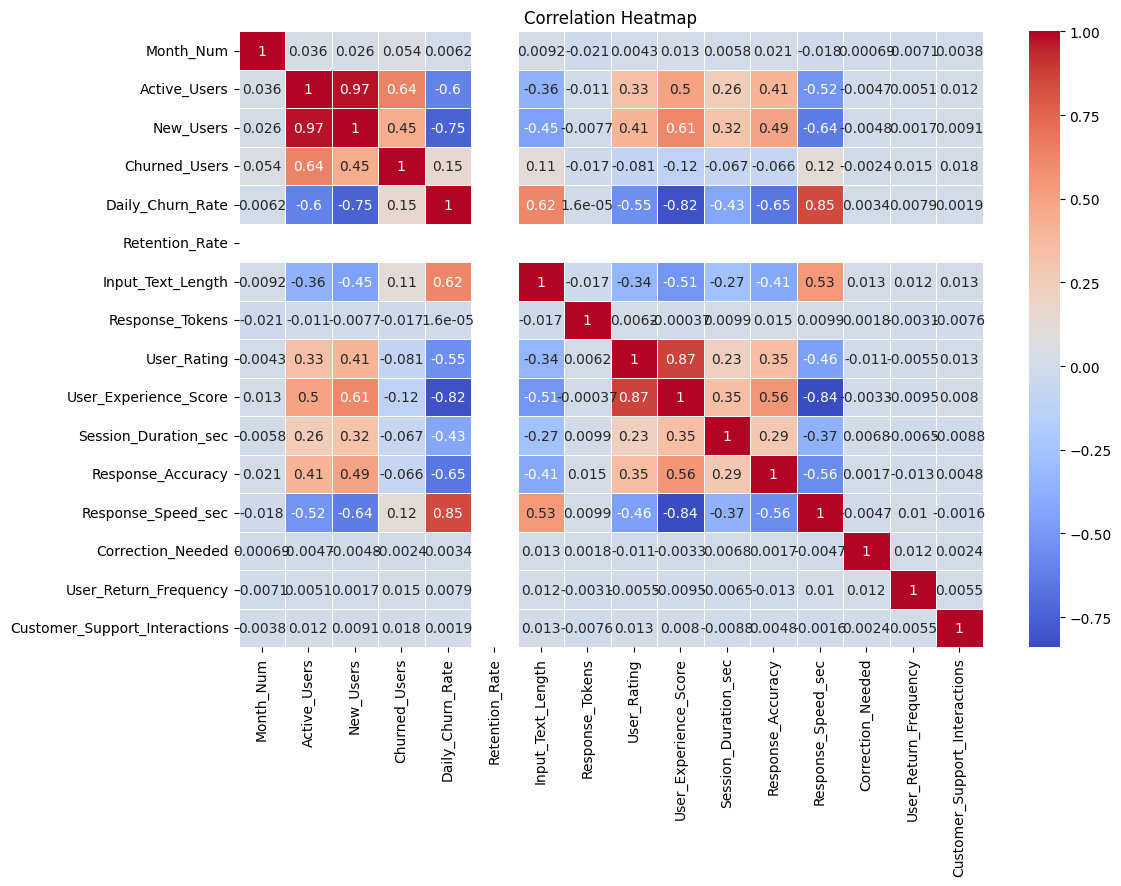

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

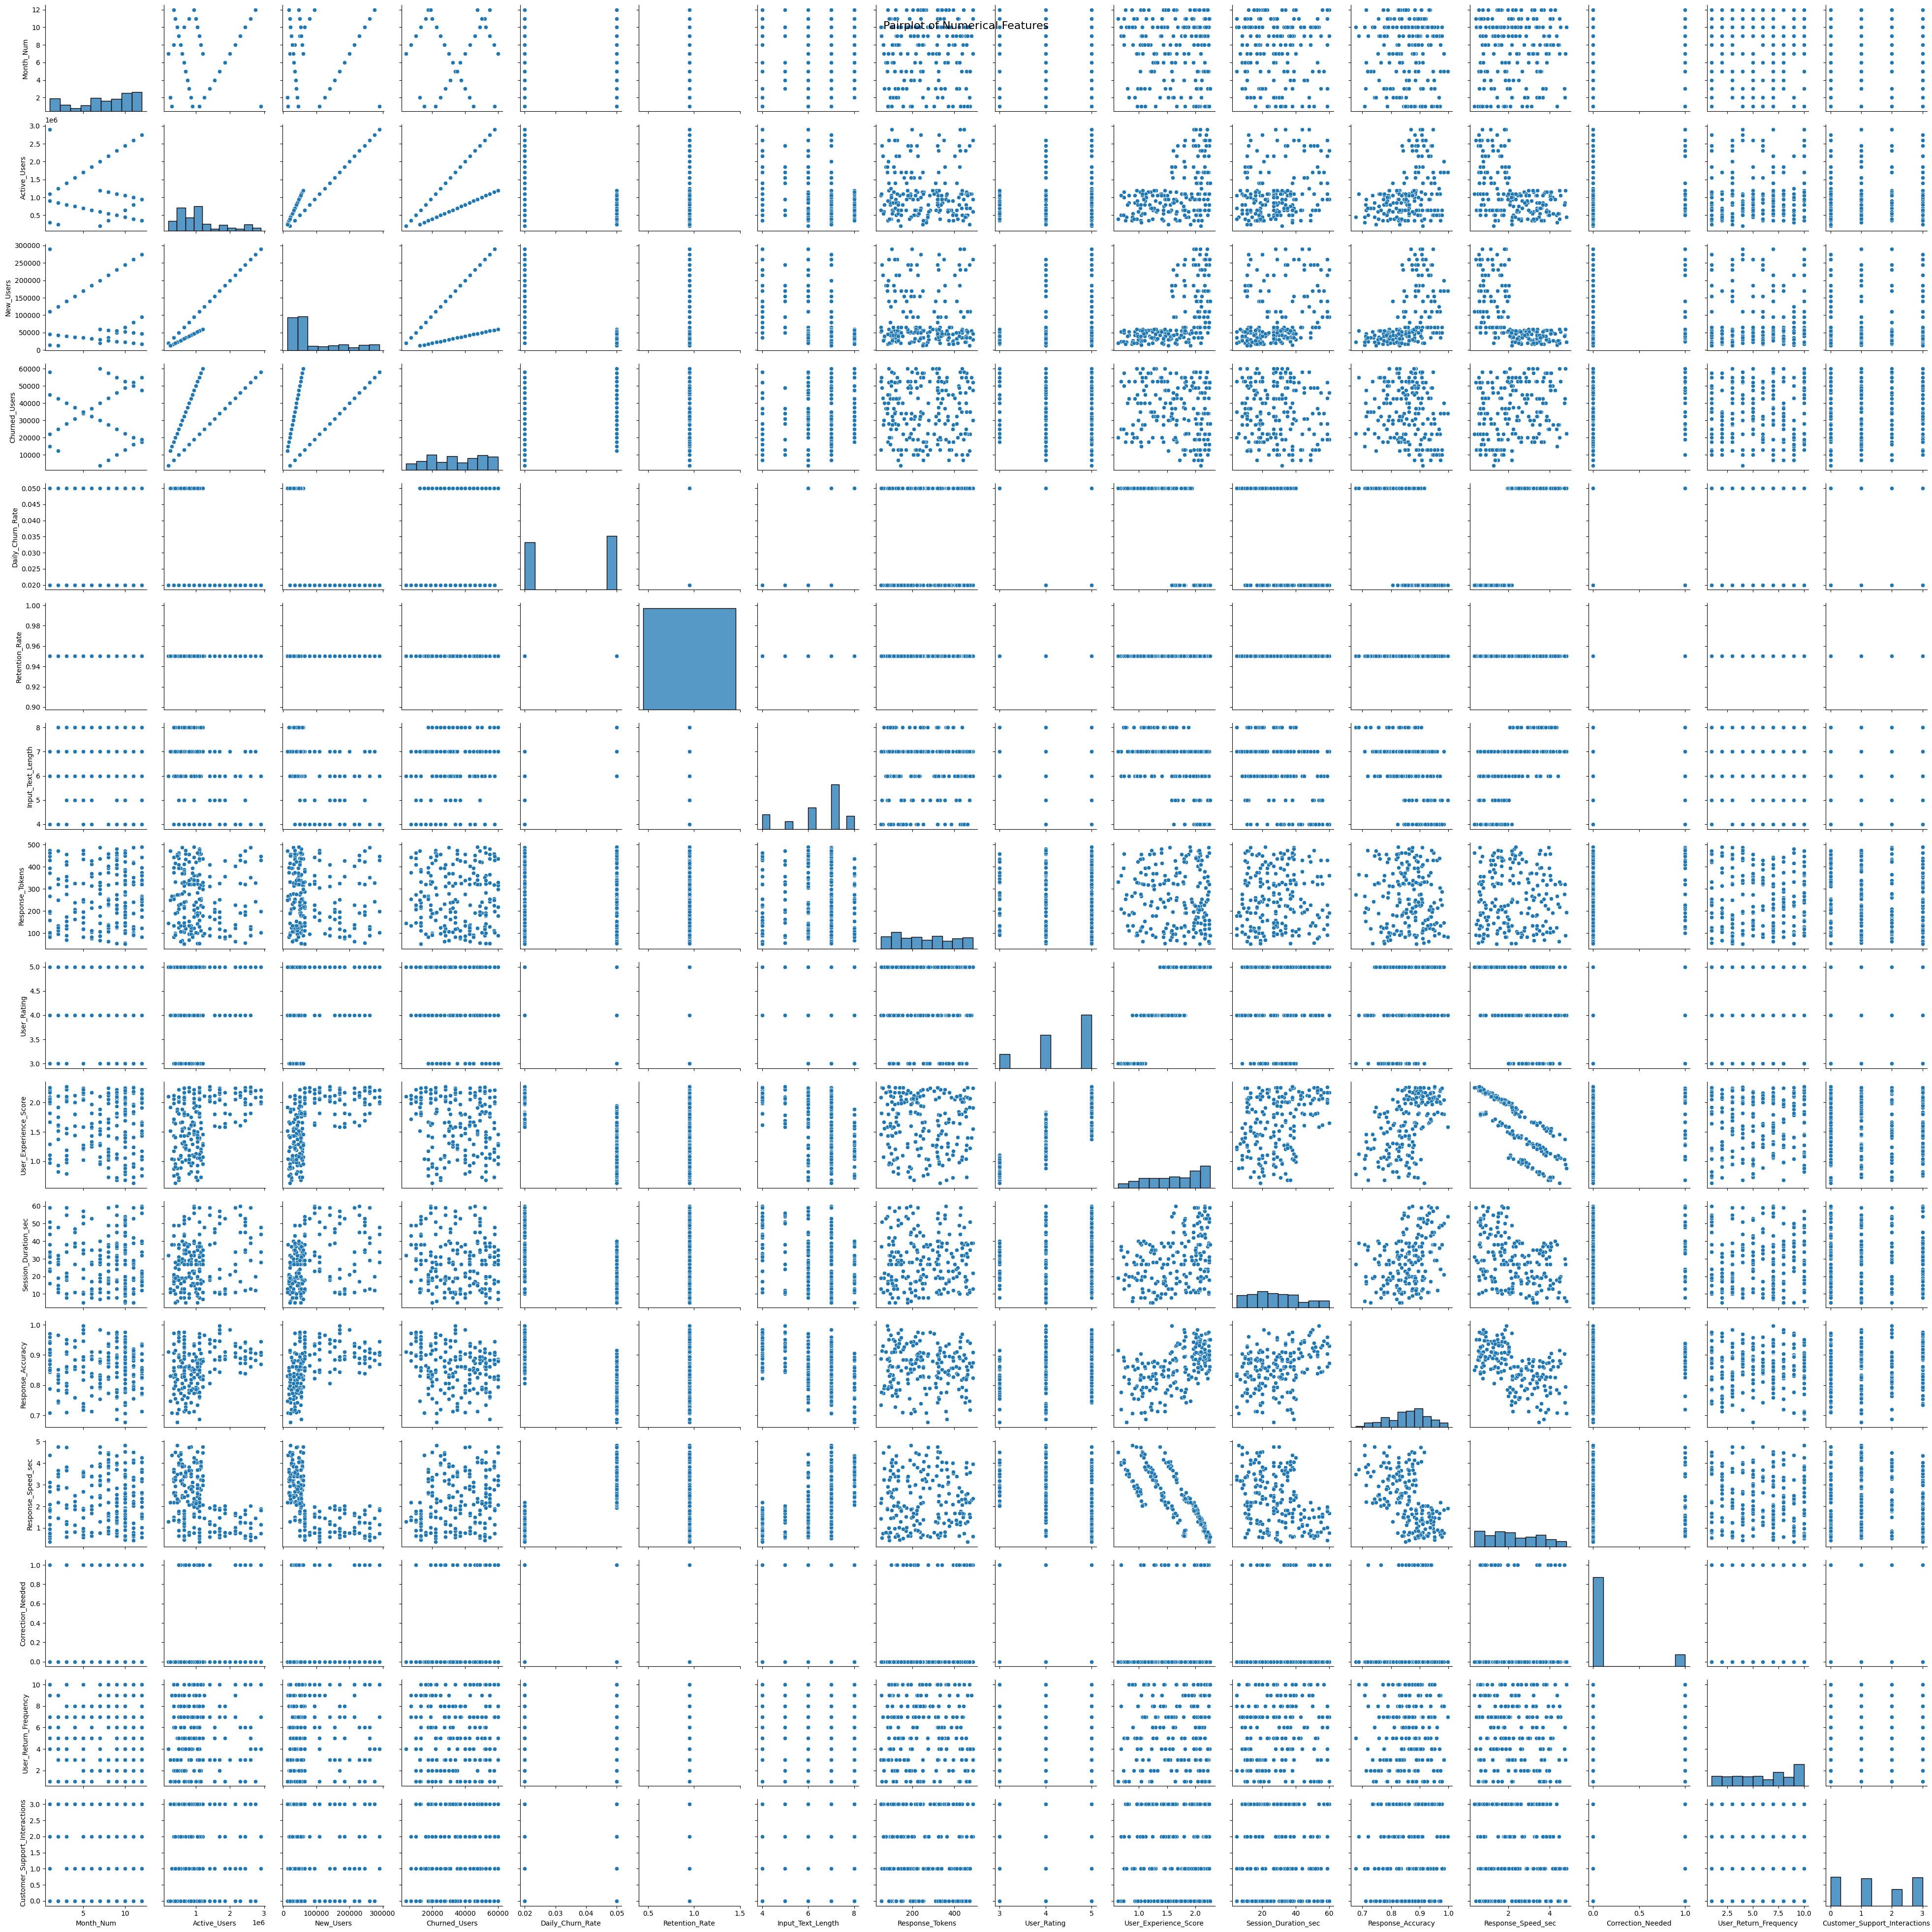

In [23]:
# Pairplot for Numerical Data
sns.pairplot(data[numeric_cols].sample(200))
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()

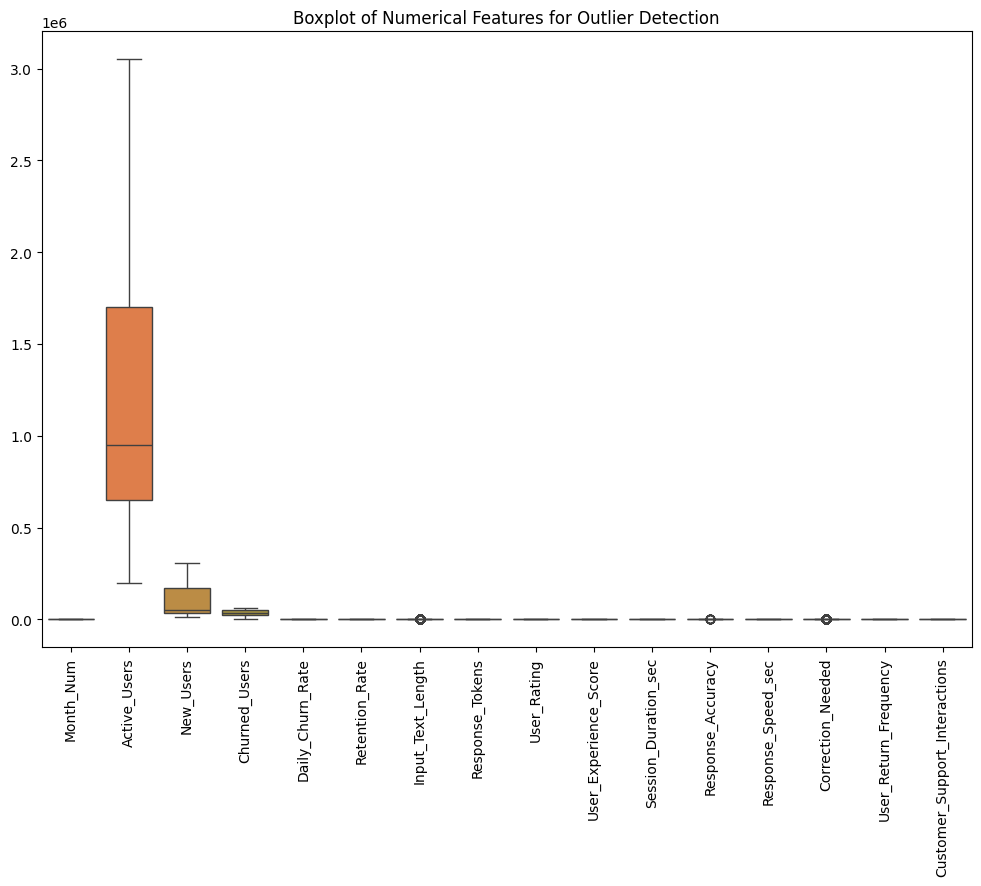

In [24]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_cols])
plt.title('Boxplot of Numerical Features for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

In [25]:
data.dtypes

Date                             datetime64[ns]
Month_Num                                 int64
Weekday                                  object
AI_Platform                              object
AI_Model_Version                         object
Active_Users                              int64
New_Users                                 int64
Churned_Users                             int64
Daily_Churn_Rate                        float64
Retention_Rate                          float64
User_ID                                  object
Query_Type                               object
Input_Text                               object
Input_Text_Length                         int64
Response_Tokens                           int64
Topic_Category                           object
User_Rating                               int64
User_Experience_Score                   float64
Session_Duration_sec                      int64
Device_Type                              object
Language                                

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


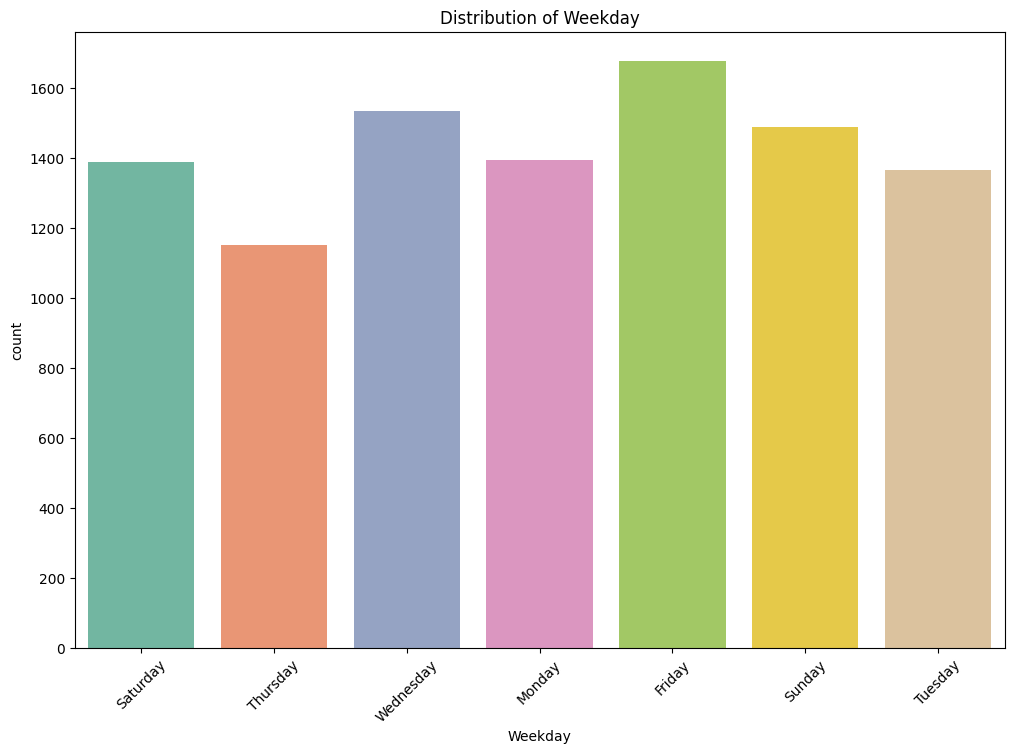

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


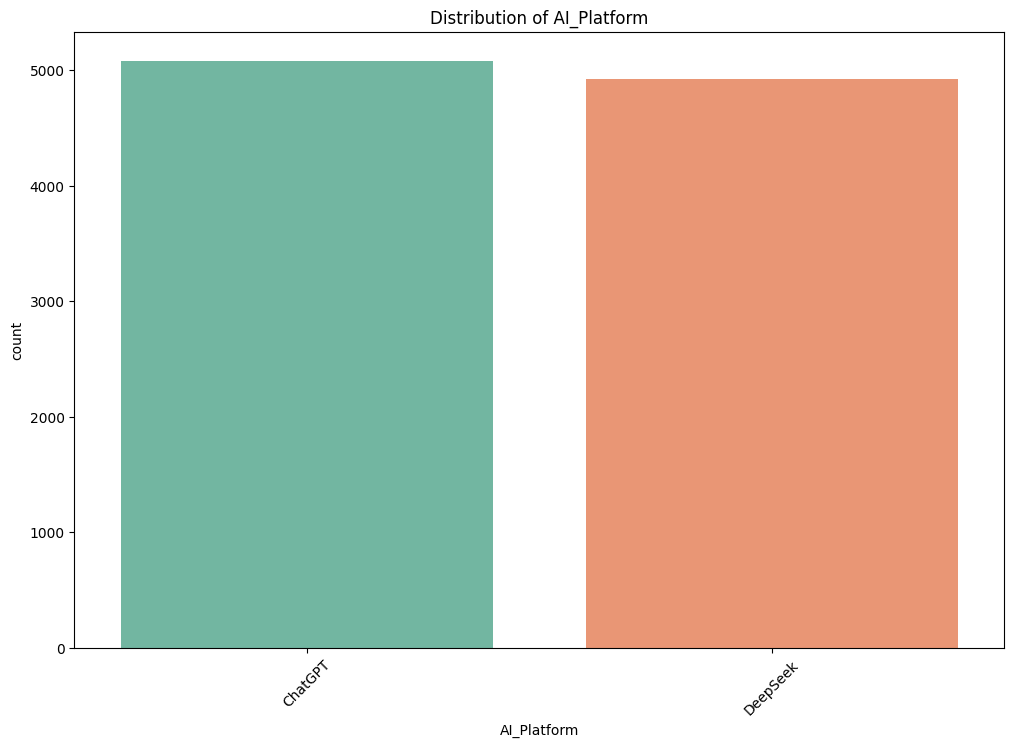

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


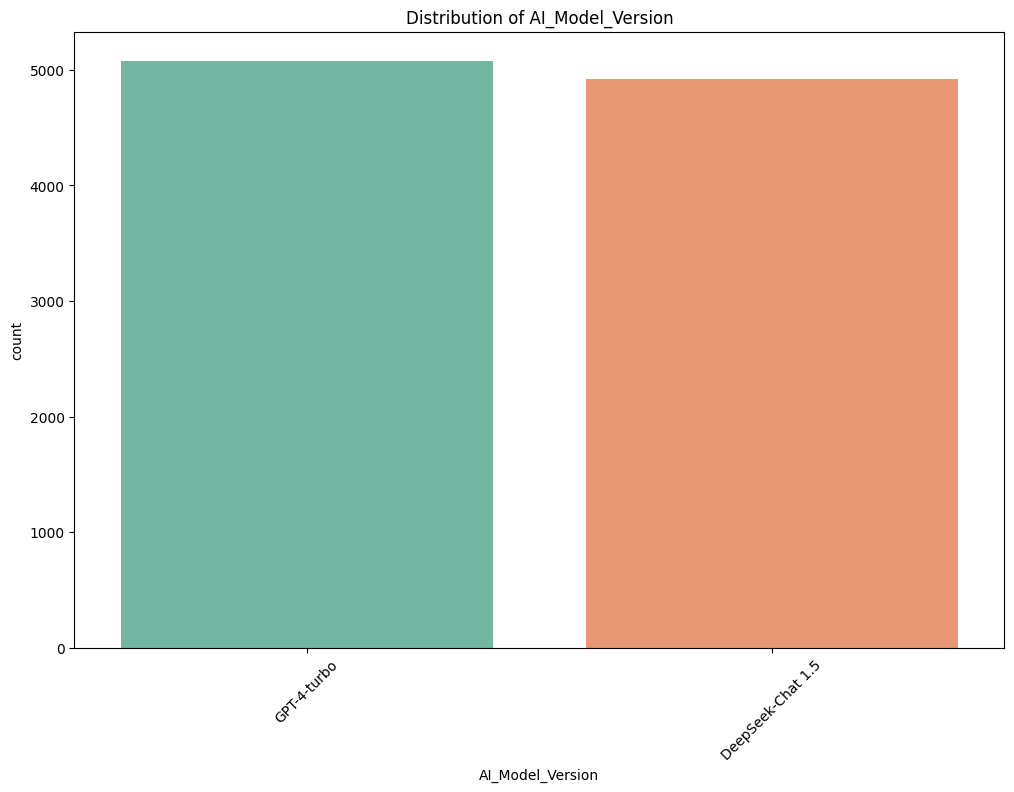

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


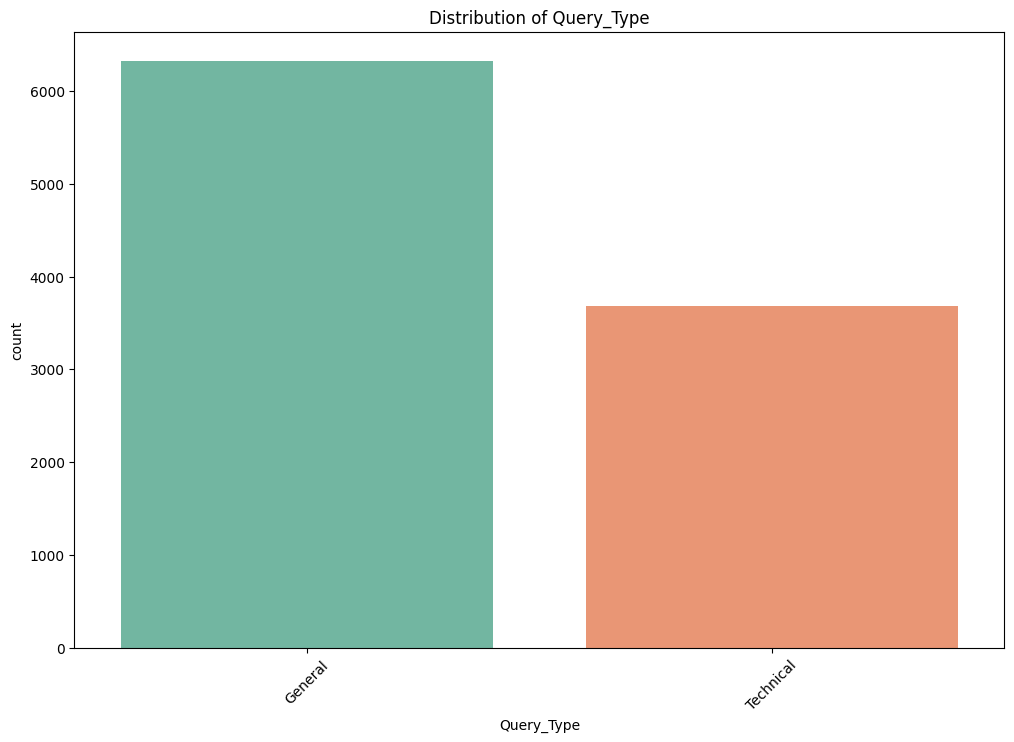

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


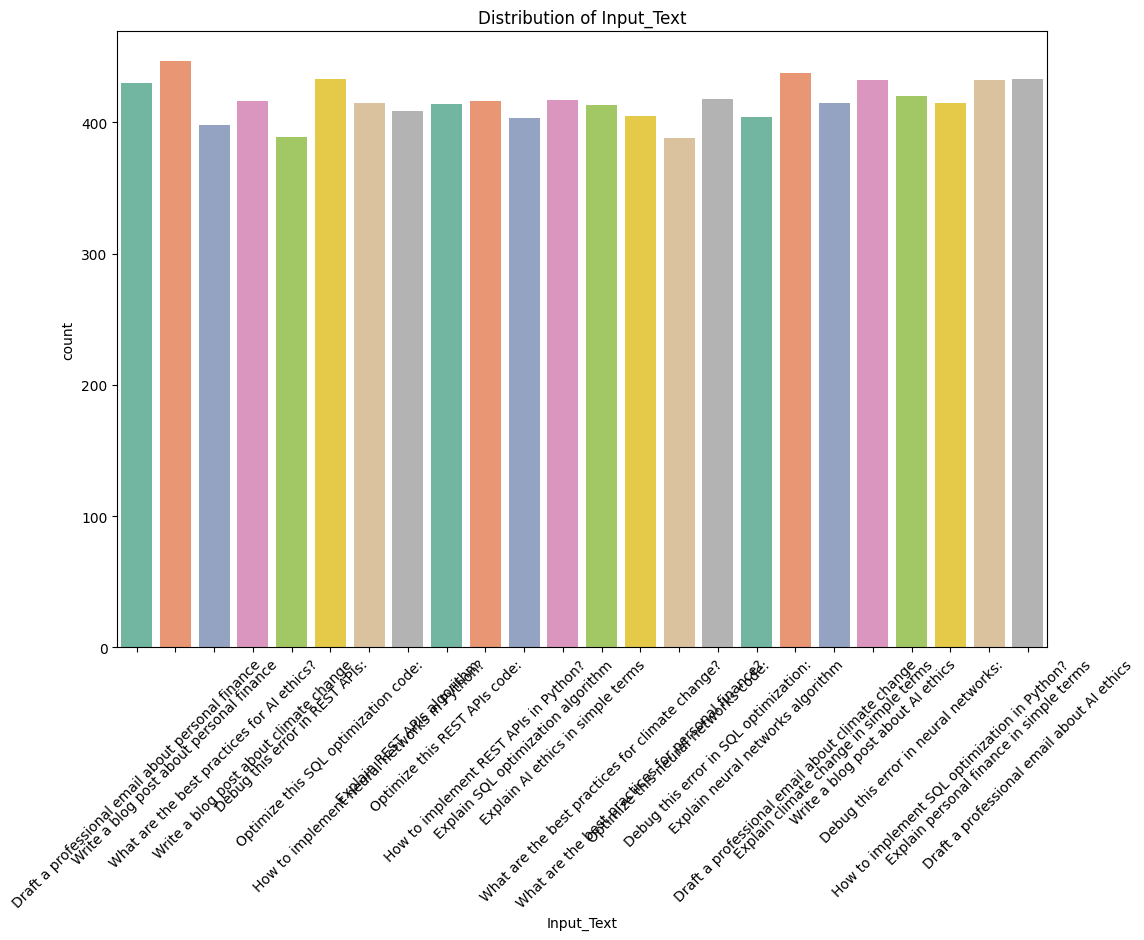

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


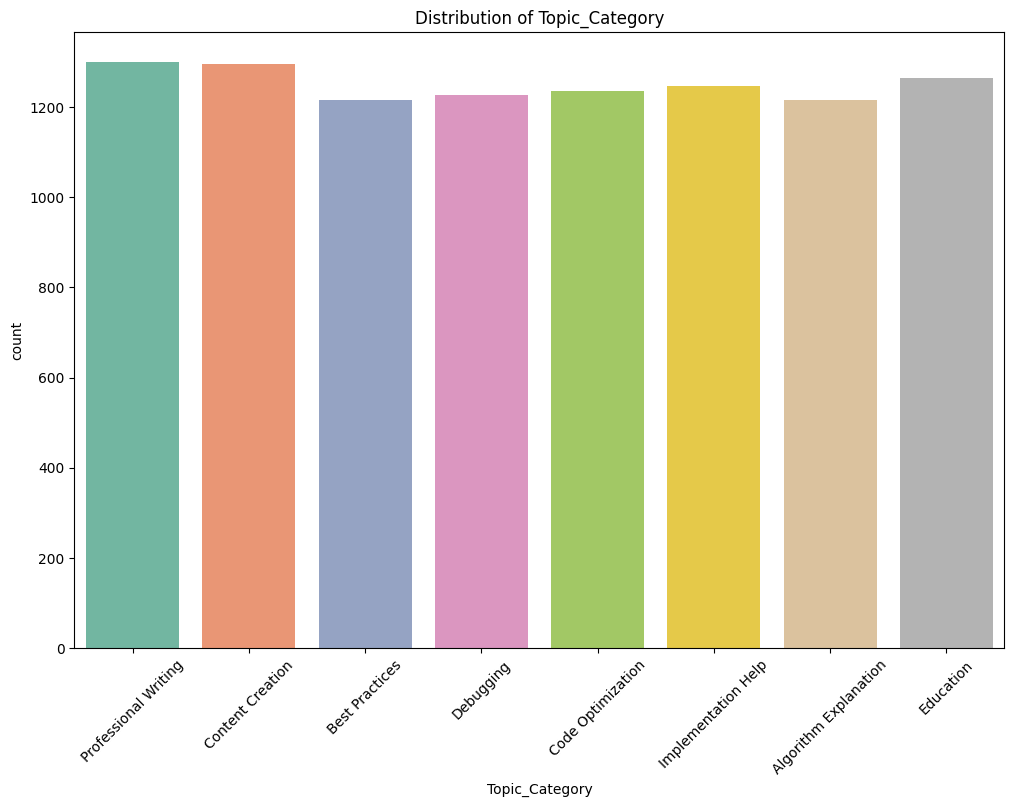

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


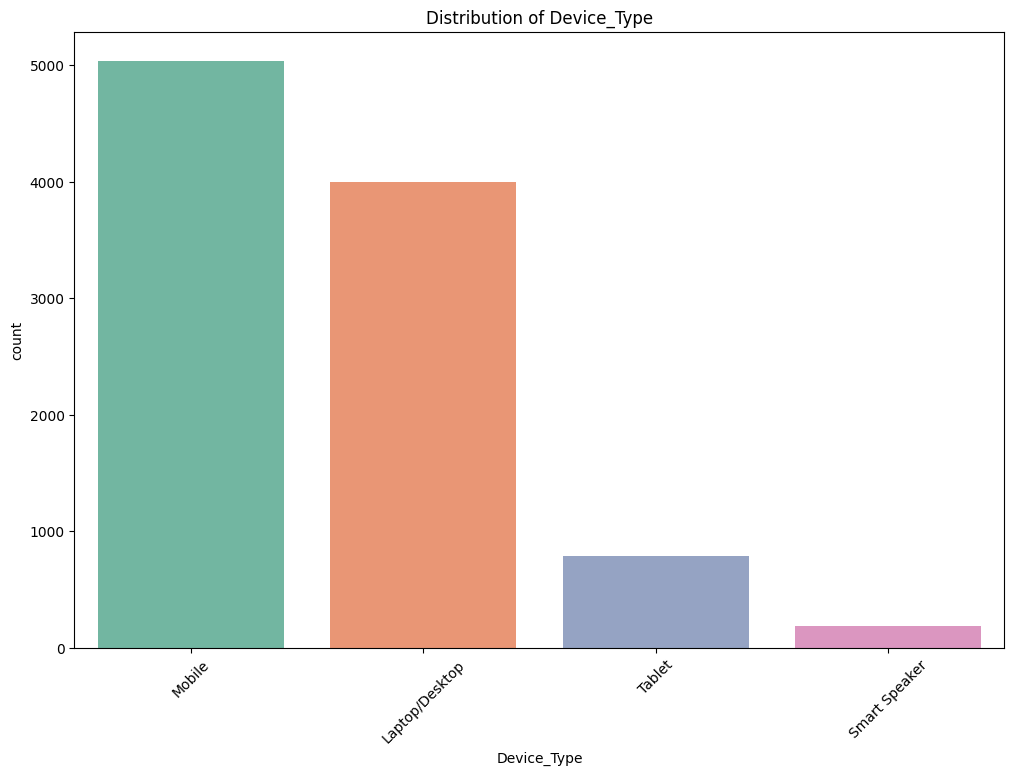

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


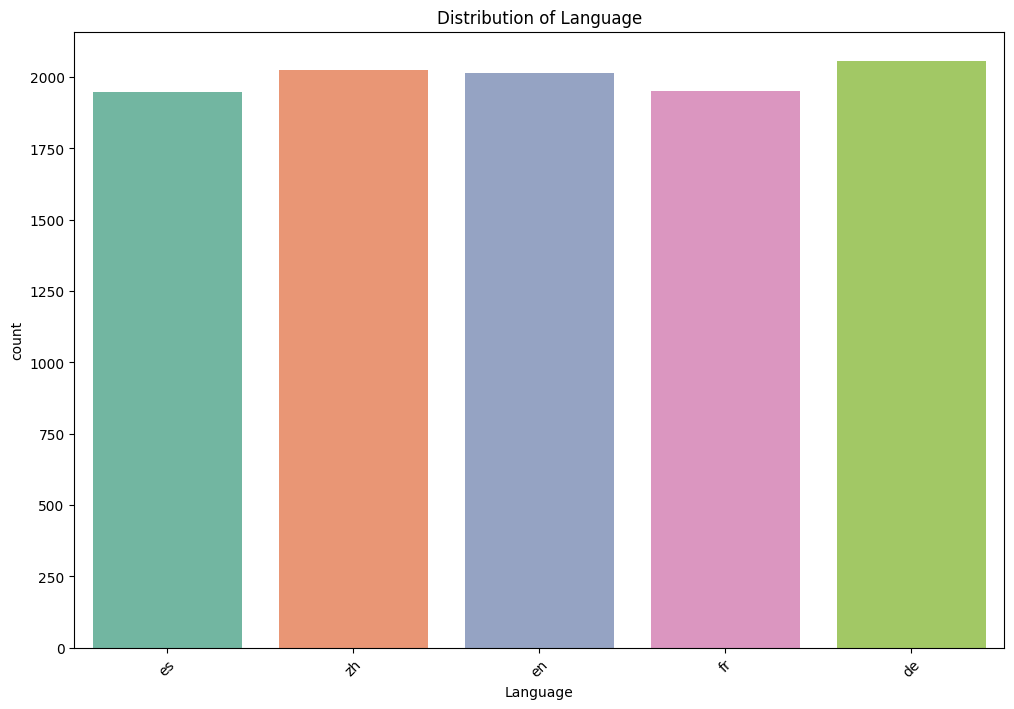

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


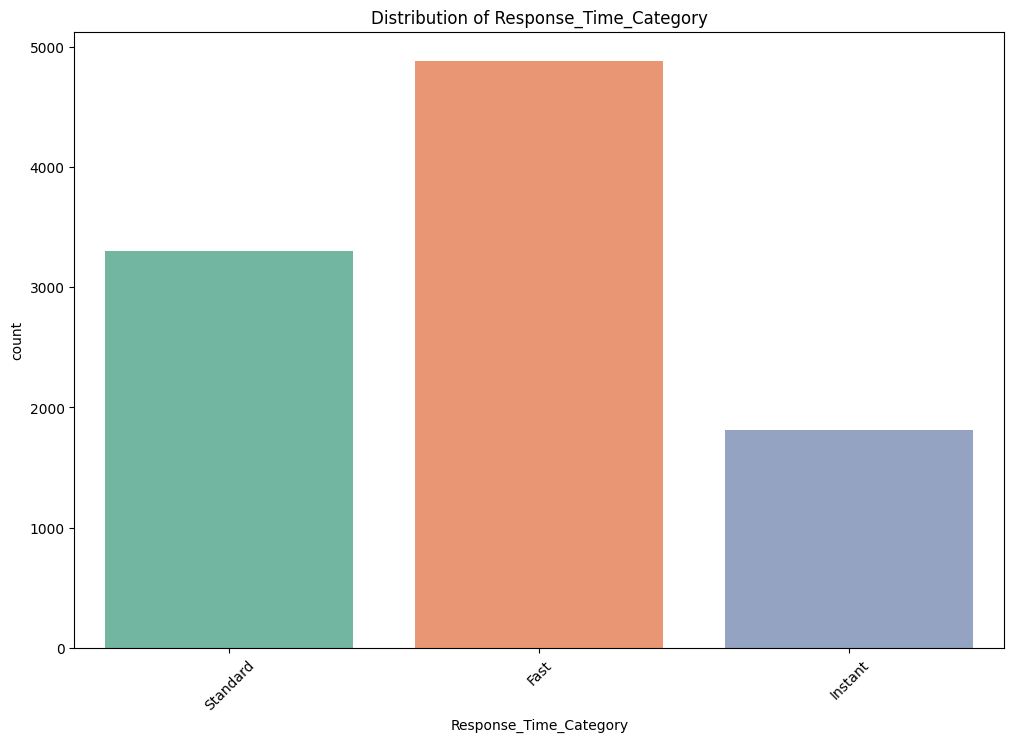

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\2204997761.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=plot_data, palette='Set2', order=top_regions)


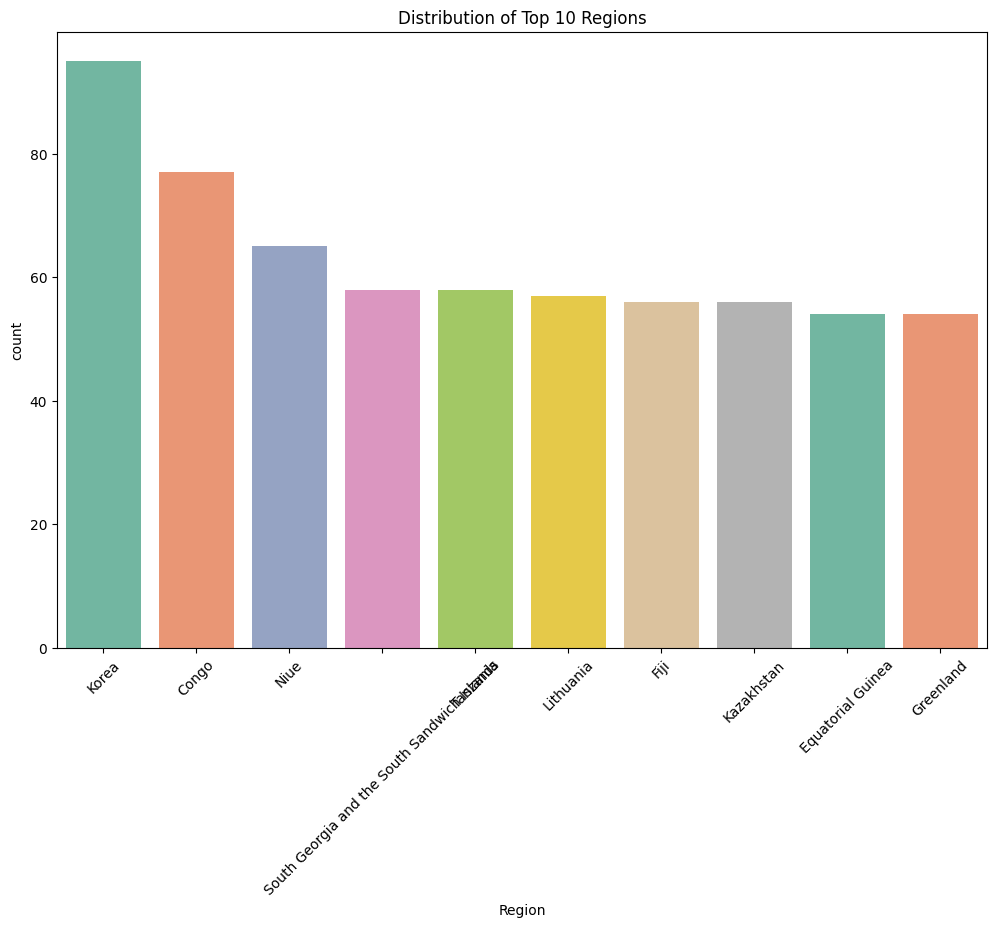

In [26]:
# Categorical Feature Distribution
# Select categorical columns excluding 'User_ID'
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols = categorical_cols[categorical_cols != 'User_ID']

for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    
    # For 'Region', plot only the top 10 regions
    if col == 'Region':
        top_regions = data['Region'].value_counts().nlargest(10).index
        plot_data = data[data['Region'].isin(top_regions)]
        sns.countplot(x=col, data=plot_data, palette='Set2', order=top_regions)
        plt.title('Distribution of Top 10 Regions')
    else:
        sns.countplot(x=col, data=data, palette='Set2')
        plt.title(f'Distribution of {col}')
        
    plt.xticks(rotation=45)
    plt.show()


C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\1860771245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AI_Platform', data=data, palette='Set1')


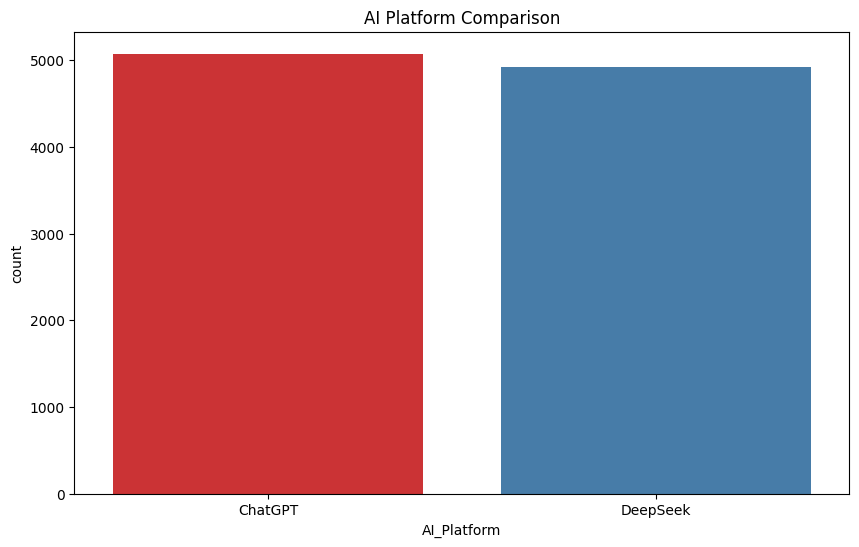

In [27]:
# Comparison of AI Platform Responses
if 'AI_Platform' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='AI_Platform', data=data, palette='Set1')
    plt.title('AI Platform Comparison')
    plt.show()

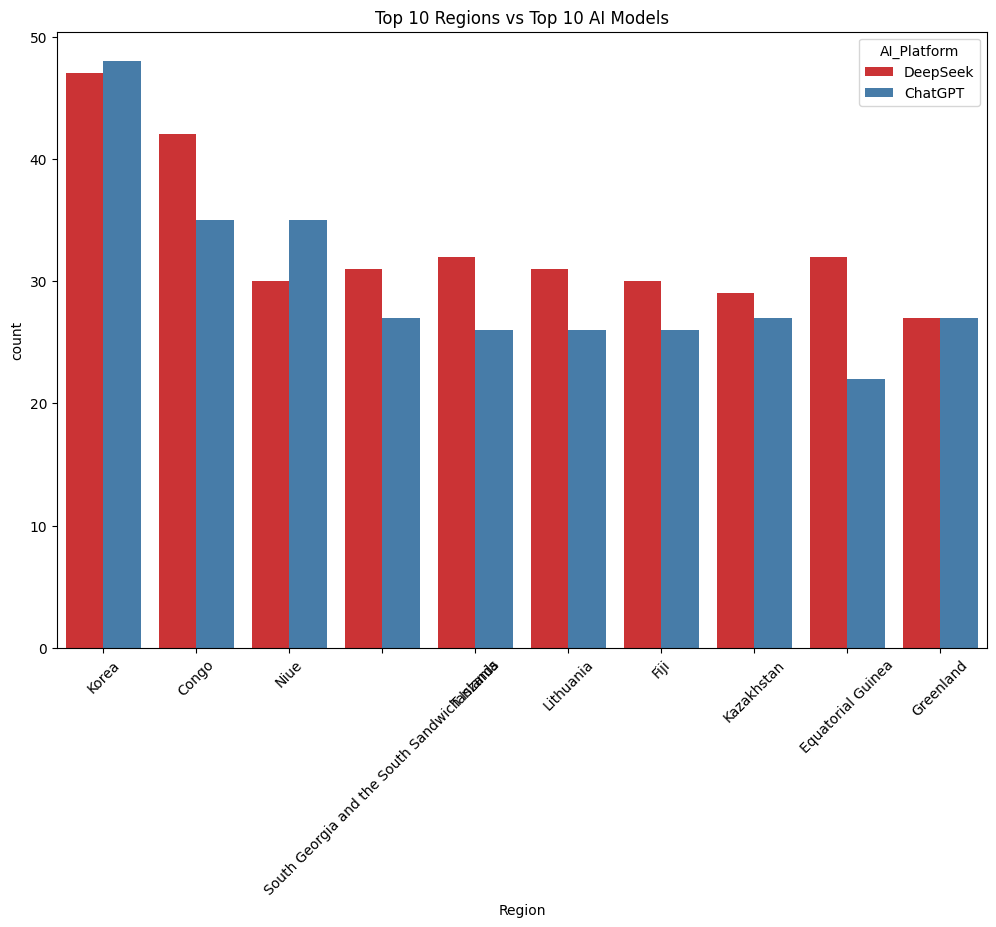

In [28]:
# Regions vs AI Model
if 'Region' in data.columns and 'AI_Platform' in data.columns:
    # Get the top 10 regions based on their frequency
    top_regions = data['Region'].value_counts().nlargest(10).index

    # Filter the dataset to include only the top 10 regions
    filtered_data = data[data['Region'].isin(top_regions)]

    # Get the top 10 AI platforms in the filtered data
    top_ai_platforms = filtered_data['AI_Platform'].value_counts().nlargest(10).index
    filtered_data = filtered_data[filtered_data['AI_Platform'].isin(top_ai_platforms)]

    plt.figure(figsize=(12, 8))
    sns.countplot(x='Region', hue='AI_Platform', data=filtered_data, palette='Set1', order=top_regions)
    plt.title('Top 10 Regions vs Top 10 AI Models')
    plt.xticks(rotation=45)
    plt.show()


In [41]:
# 7. Standardization, Normalization, and Anomaly Detection

# Normalization (Min-Max scaling)
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)
print("\nNormalized Data Sample:")
print(df_normalized.head())


Normalized Data Sample:
   Month_Num  Active_Users  New_Users  Churned_Users  Daily_Churn_Rate  \
0   0.727273      0.105263   0.042735       0.368421               1.0   
1   0.727273      0.105263   0.042735       0.368421               1.0   
2   0.727273      0.105263   0.042735       0.368421               1.0   
3   0.727273      0.105263   0.042735       0.368421               1.0   
4   0.363636      0.526316   0.538462       0.526316               0.0   

   Retention_Rate  Input_Text_Length  Response_Tokens  User_Rating  \
0             0.0               0.75         0.511111          0.5   
1             0.0               0.75         0.066667          0.5   
2             0.0               1.00         0.180000          0.0   
3             0.0               0.75         0.835556          1.0   
4             0.0               0.50         0.366667          1.0   

   User_Experience_Score  Session_Duration_sec  Response_Accuracy  \
0               0.444444              0.

In [42]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)
print("\nStandardized Data Sample:")
print(df_standardized.head())


Standardized Data Sample:
   Month_Num  Active_Users  New_Users  Churned_Users  Daily_Churn_Rate  \
0   0.525659     -0.935312  -0.882320      -0.700083          0.984914   
1   0.525659     -0.935312  -0.882320      -0.700083          0.984914   
2   0.525659     -0.935312  -0.882320      -0.700083          0.984914   
3   0.525659     -0.935312  -0.882320      -0.700083          0.984914   
4  -0.598084      0.676704   0.812005      -0.093959         -1.015317   

   Retention_Rate  Input_Text_Length  Response_Tokens  User_Rating  \
0    1.110223e-16           0.622044         0.040247    -0.537362   
1    1.110223e-16           0.622044        -1.497378    -0.537362   
2    1.110223e-16           1.463440        -1.105284    -1.898805   
3    1.110223e-16           0.622044         1.162713     0.824081   
4    1.110223e-16          -0.219352        -0.459482     0.824081   

   User_Experience_Score  Session_Duration_sec  Response_Accuracy  \
0              -0.705732              

In [43]:
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[numeric_cols])

In [44]:
# Count anomalies
total_anomalies = data['anomaly'].value_counts()
print("\nAnomaly Detection Results:")
print(total_anomalies)


Anomaly Detection Results:
anomaly
 1    9500
-1     500
Name: count, dtype: int64


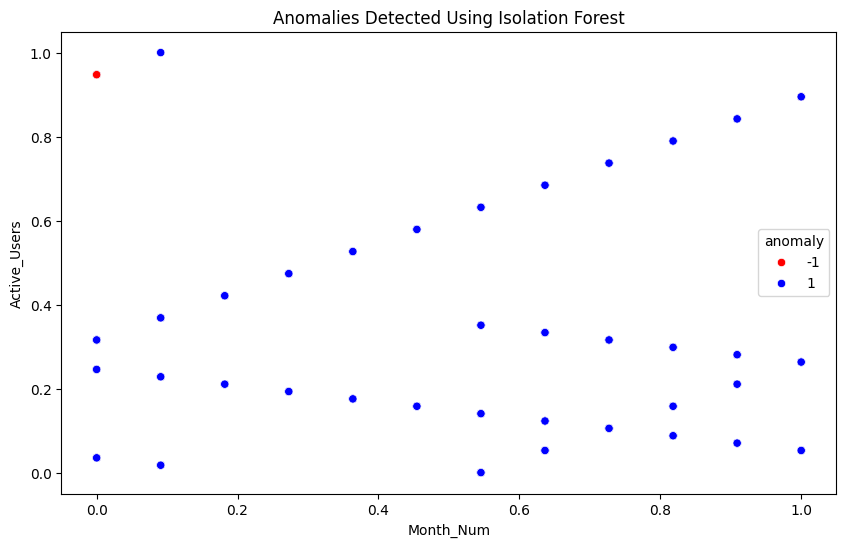

In [45]:
# Anomalies Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_normalized.iloc[:, 0], y=df_normalized.iloc[:, 1], hue=data['anomaly'], palette={1: 'blue', -1: 'red'})
plt.title('Anomalies Detected Using Isolation Forest')
plt.show()

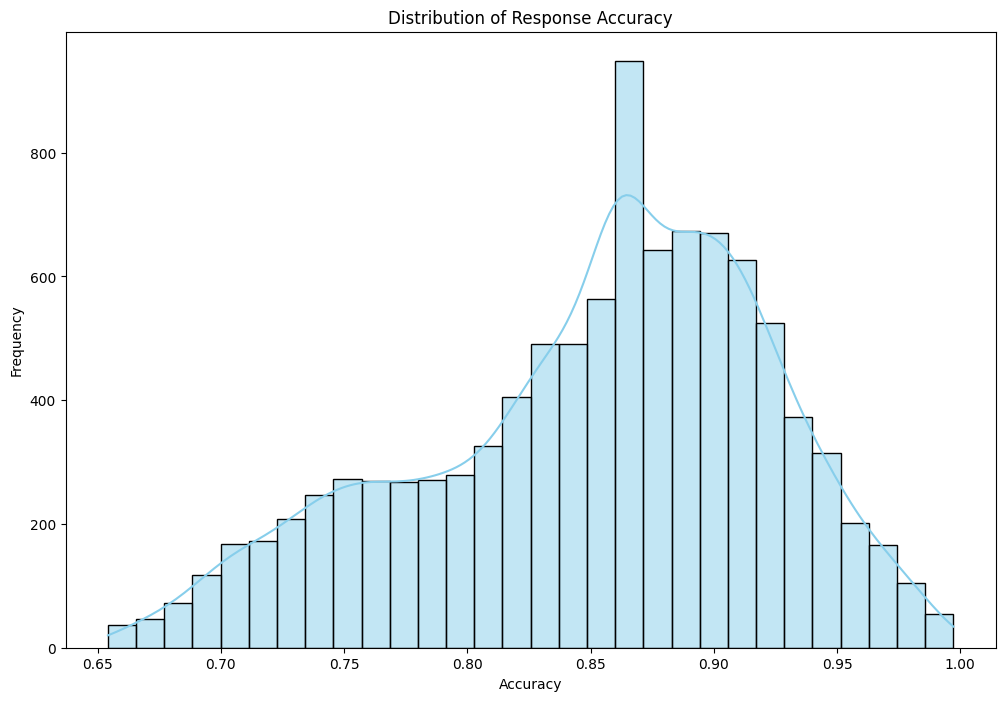

In [46]:
if 'Response_Accuracy' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(data['Response_Accuracy'], kde=True, color='skyblue', bins=30)
    plt.title('Distribution of Response Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.show()

In [47]:
# 8. Model Building and Evaluation

# Prepare data for model training
# Assuming 'AI_Platform' is the target variable
X = data[numeric_cols]
y = data['AI_Platform']

In [48]:
# Encode target variable
y = pd.factorize(y)[0]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [49]:
# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
 [[1546    0]
 [   0 1454]]


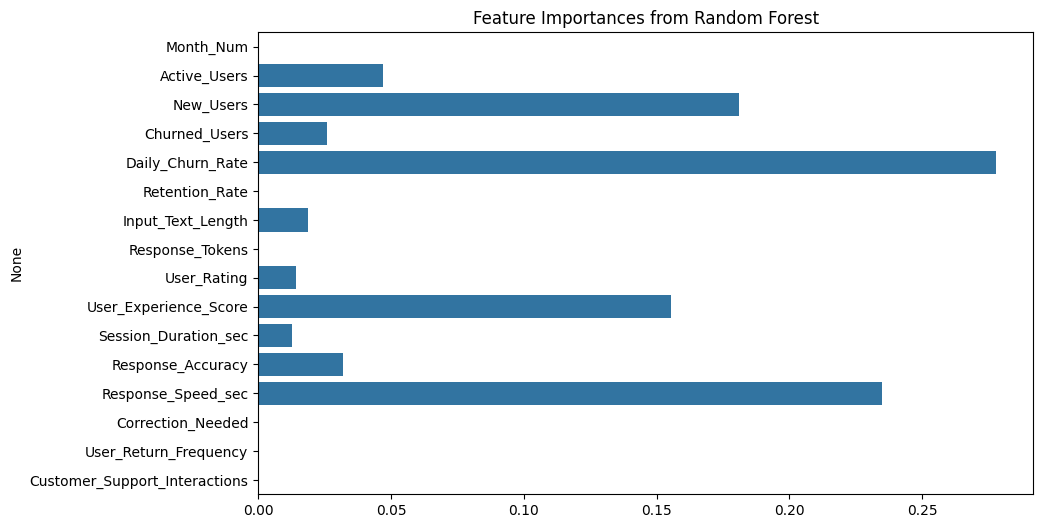

In [50]:
# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=numeric_cols)
plt.title('Feature Importances from Random Forest')
plt.show()

In [51]:
# 9. Model Tuning (Hyperparameter Optimization)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("\nBest Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}


In [52]:
# Evaluate tuned model
tuned_model = random_search.best_estimator_
y_tuned_pred = tuned_model.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_tuned_pred))
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_tuned_pred))


Tuned Model Accuracy: 1.0

Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\233222556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Platform', y='Response_Accuracy', data=mean_accuracy, palette='Set2')


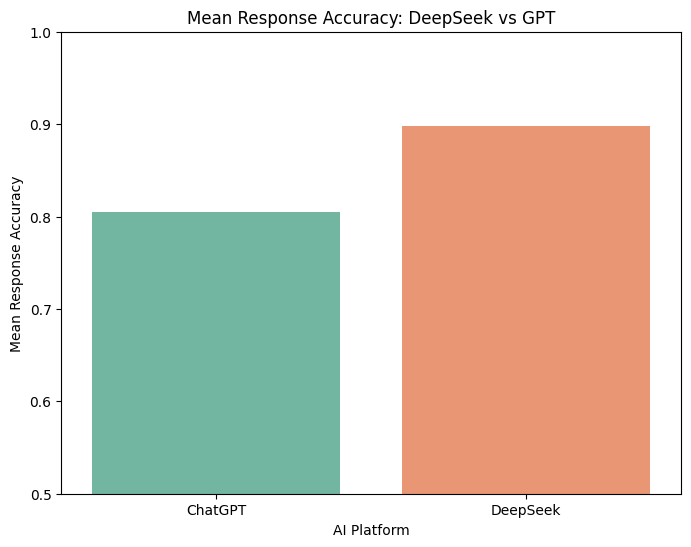

In [60]:
if 'Response_Accuracy' in data.columns and 'AI_Platform' in data.columns:
    # Filter for DeepSeek and GPT only
    filtered_data = data[data['AI_Platform'].isin(['DeepSeek', 'ChatGPT'])]

    # Calculate mean accuracy for each model
    mean_accuracy = filtered_data.groupby('AI_Platform')['Response_Accuracy'].mean().reset_index()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='AI_Platform', y='Response_Accuracy', data=mean_accuracy, palette='Set2')
    plt.title('Mean Response Accuracy: DeepSeek vs GPT')
    plt.xlabel('AI Platform')
    plt.ylabel('Mean Response Accuracy')
    plt.ylim(0.5, 1.0)  # Assuming accuracy is between 0 and 1
    plt.show()


In [63]:
data.dtypes

Date                             datetime64[ns]
Month_Num                                 int64
Weekday                                  object
AI_Platform                              object
AI_Model_Version                         object
Active_Users                              int64
New_Users                                 int64
Churned_Users                             int64
Daily_Churn_Rate                        float64
Retention_Rate                          float64
User_ID                                  object
Query_Type                               object
Input_Text                               object
Input_Text_Length                         int64
Response_Tokens                           int64
Topic_Category                           object
User_Rating                               int64
User_Experience_Score                   float64
Session_Duration_sec                      int64
Device_Type                              object
Language                                

In [62]:
# Check unique values in a categorical column
data['AI_Platform'].unique()

array(['ChatGPT', 'DeepSeek'], dtype=object)

In [64]:
data['Weekday'].unique()

array(['Saturday', 'Thursday', 'Wednesday', 'Monday', 'Friday', 'Sunday',
       'Tuesday'], dtype=object)

In [65]:
data['Language'].unique()

array(['es', 'zh', 'en', 'fr', 'de'], dtype=object)

In [67]:
data['Topic_Category'].unique()

array(['Professional Writing', 'Content Creation', 'Best Practices',
       'Debugging', 'Code Optimization', 'Implementation Help',
       'Algorithm Explanation', 'Education'], dtype=object)

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\3972434944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Platform', y='User_Rating', data=mean_rating, palette='Set2')


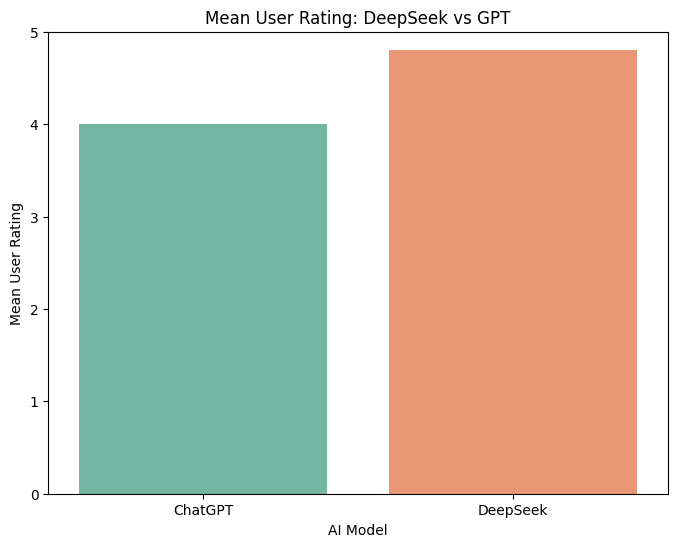

In [66]:
if 'User_Rating' in data.columns and 'AI_Platform' in data.columns:
    # Filter for DeepSeek and GPT only
    filtered_data = data[data['AI_Platform'].isin(['DeepSeek', 'ChatGPT'])]

    # Calculate mean user rating for each model
    mean_rating = filtered_data.groupby('AI_Platform')['User_Rating'].mean().reset_index()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='AI_Platform', y='User_Rating', data=mean_rating, palette='Set2')
    plt.title('Mean User Rating: DeepSeek vs GPT')
    plt.xlabel('AI Model')
    plt.ylabel('Mean User Rating')
    plt.ylim(0, 5)  # Assuming user ratings are on a 0-5 scale
    plt.show()


In [77]:
from scipy.stats import zscore

# Calculate Z-scores for each numeric column
for col in data.select_dtypes(include=['number']).columns:
    data[f'{col}_z_score'] = zscore(data[col])

# Identify outliers (Z-score > 3 or < -3)
outliers = data[(data.filter(like='_z_score').abs() > 3).any(axis=1)]
outliers

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13780\3797437493.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  data[f'{col}_z_score'] = zscore(data[col])


,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,User_ID,Query_Type,Input_Text,Input_Text_Length,Response_Tokens,Topic_Category,User_Rating,User_Experience_Score,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region,anomaly,Month_Num_z_score,Active_Users_z_score,New_Users_z_score,Churned_Users_z_score,Daily_Churn_Rate_z_score,Retention_Rate_z_score,Input_Text_Length_z_score,Response_Tokens_z_score,User_Rating_z_score,User_Experience_Score_z_score,Session_Duration_sec_z_score,Response_Accuracy_z_score,Response_Speed_sec_z_score,Correction_Needed_z_score,User_Return_Frequency_z_score,Customer_Support_Interactions_z_score,anomaly_z_score,Month_Num_z_score_z_score,Active_Users_z_score_z_score,New_Users_z_score_z_score,Churned_Users_z_score_z_score,Daily_Churn_Rate_z_score_z_score,Retention_Rate_z_score_z_score,Input_Text_Length_z_score_z_score,Response_Tokens_z_score_z_score,User_Rating_z_score_z_score,User_Experience_Score_z_score_z_score,Session_Duration_sec_z_score_z_score,Response_Accuracy_z_score_z_score,Response_Speed_sec_z_score_z_score,Correction_Needed_z_score_z_score,User_Return_Frequency_z_score_z_score,Customer_Support_Interactions_z_score_z_score,anomaly_z_score_z_score
17,2024-12-11,12,Wednesday,ChatGPT,GPT-4-turbo,350000,17500,17500,0.05,0.95,c46e5bfa-a271-4780-8253-41eedafa11a6,General,What are the best practices for climate change?,8,50,Best Practices,4,1.10,20,Mobile,es,0.7234,3.98,Standard,0,2,0,Ethiopia,-1,1.368466,-1.136814,-0.969957,-1.205187,0.984914,NaN,1.463440,-1.728022,-0.537362,-1.072129,-0.605672,-1.783564,1.245207,-0.411149,-1.231134,-1.317594,-4.358899,1.368466,-1.136814,-0.969957,-1.205187,0.984914,NaN,1.463440,-1.728022,-0.537362,-1.072129,-0.605672,-1.783564,1.245207,-0.411149,-1.231134,-1.317594,-4.358899
18,2024-12-11,12,Wednesday,ChatGPT,GPT-4-turbo,350000,17500,17500,0.05,0.95,5f816bec-a80e-45a9-9907-7104c6e2d3cb,General,What are the best practices for personal finance?,8,57,Best Practices,5,1.50,8,Laptop/Desktop,zh,0.7015,3.90,Standard,0,10,0,Czech Republic,-1,1.368466,-1.136814,-0.969957,-1.205187,0.984914,NaN,1.463440,-1.674205,0.824081,-0.257915,-1.457361,-2.090307,1.183842,-0.411149,1.558497,-1.317594,-4.358899,1.368466,-1.136814,-0.969957,-1.205187,0.984914,NaN,1.463440,-1.674205,0.824081,-0.257915,-1.457361,-2.090307,1.183842,-0.411149,1.558497,-1.317594,-4.358899
24,2024-12-02,12,Monday,DeepSeek,DeepSeek-Chat 1.5,2750000,275000,55000,0.02,0.95,e9835624-ac91-41d5-b72c-c770f6894884,Technical,Optimize this neural networks code:,5,234,Code Optimization,5,2.01,16,Tablet,zh,0.8799,1.94,Fast,1,7,0,Namibia,-1,1.368466,2.087219,2.038930,1.320330,-1.015317,NaN,-1.060748,-0.313407,0.824081,0.780209,-0.889568,0.408457,-0.319597,2.432207,0.512385,-1.317594,-4.358899,1.368466,2.087219,2.038930,1.320330,-1.015317,NaN,-1.060748,-0.313407,0.824081,0.780209,-0.889568,0.408457,-0.319597,2.432207,0.512385,-1.317594,-4.358899
64,2023-08-12,8,Saturday,ChatGPT,GPT-4-turbo,1150000,57500,57500,0.05,0.95,4c815027-5a77-4705-be37-f5762fdec738,General,What are the best practices for personal finance?,8,88,Best Practices,3,0.89,5,Mobile,es,0.6827,3.08,Fast,0,5,0,Azerbaijan,-1,0.244723,-0.062137,-0.502557,1.488698,0.984914,NaN,1.463440,-1.435873,-1.898805,-1.499591,-1.670284,-2.353630,0.554853,-0.411149,-0.185022,-1.317594,-4.358899,0.244723,-0.062137,-0.502557,1.488698,0.984914,NaN,1.463440,-1.435873,-1.898805,-1.499591,-1.670284,-2.353630,0.554853,-0.411149,-0.185022,-1.317594,-4.358899
71,2025-01-12,1,Sunday,DeepSeek,DeepSeek-Chat 1.5,2900000,290000,58000,0.02,0.95,cdd06a41-5daa-4838-aec5-30a417804fbe,General,How to implement SQL optimization in Python?,7,500,Implementation Help,5,2.13,20,Mobile,fr,0.9287,1.38,Fast,1,3,1,Guernsey,-1,-1.721826,2.288721,2.214205,1.522371,-1.015317,NaN,0.622044,1.731634,0.824081,1.024473,

In [78]:
import joblib

In [ ]:
joblib.dump (model, 'model.pkl')